## 線形回帰
### 1. 説明変数が1次元の場合（単回帰）
- 切片と傾きのベクトル表現：$\mathbf{w} = (w_0, w_1)^{\mathrm{T}} $
- モデルへの入力：$\mathbf{x} = (1, x_1)^{\mathrm{T}} $
- 以上の2つが与えられたときのモデルの出力：$\hat{Y}(\mathbf{x}; \mathbf{w}) =  \mathbf{w}^{\mathrm{T}} \mathbf{x} = w_0 + w_1 x_1$

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### 2. 疑似データで線形回帰

In [13]:
# 入力データ x = [0, 1, 2, ..., 99]
x = np.arange(100)

# 教師データy：平均0, 標準偏差10の正規分布からサンプリングした乱数（ノイズ）をxに加えたものをyとする
np.random.seed(seed=1234)
y = np.random.normal(loc=x, scale=10)

# 本当の判断ルール：ノイズなしのデータ，つまりxそのもの
y_true = x.copy() 

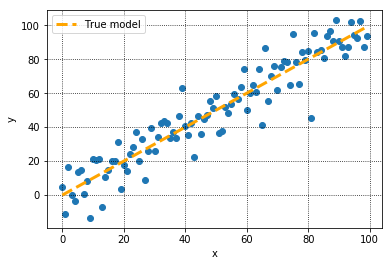

In [3]:
plt.scatter(x, y, marker='o')
plt.plot(x, y_true, linestyle='--', linewidth=3, color='orange', label='True model')
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

In [4]:
# 重みwの値を，まずはデタラメに決めてみる（実行するたびに結果が変わります）
w = np.random.normal(loc=0, scale=1, size=2)
y_est = w[0] + w[1] * x
print('w0 = {:.3f}, w1 = {:.3f}'.format(w[0], w[1]))

w0 = 0.291, w1 = 0.567


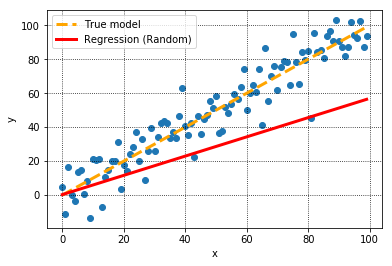

In [5]:
# オレンジ：真に得たいモデル
# 赤：重みをデタラメに決めたときのモデルの出力
plt.scatter(x, y, marker='o')
plt.plot(x, y_true, linestyle='--', linewidth=3, color='orange', label='True model')
plt.plot(x, y_est, linestyle='-', linewidth=3, color='red', label='Regression (Random)')
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

In [6]:
# モデルの出力と教師データとの二乗誤差を計算し，モデルの評価値を出してみる
squared_error = 0.5 * np.sum( (y_est - y) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, 二乗誤差 = {:.3f}'.format(w[0], w[1], squared_error))

w0 = 0.291, w1 = 0.567, 二乗誤差 = 35681.671


In [7]:
# 最小二乗法によって得られた最適な重みを計算
phi = np.ones((len(x), 2))
phi[:, 1] = x

# 注意：線形代数における行列積は * ではなく @ で計算すること！（Python3系のみ）
# Python2系では，np.dot(A, B)で計算
w_best = np.linalg.inv(phi.T @ phi) @ phi.T @ y
# w_best = np.dot(np.dot(np.linalg.inv(np.dot(phi.T, phi)), phi.T), y) #Python2用

# 求めた最適な重みを使ってモデルの出力を計算
y_est_best = w_best[0] + w_best[1] * x

squared_error = 0.5 * np.sum( (y_est_best - y) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, 二乗誤差 = {:.3f}'.format(w_best[0], w_best[1], squared_error)) 
# デタラメに決めるよりは二乗誤差が小さい！これは良さそう

w0 = 0.696, w1 = 0.993, 二乗誤差 = 4954.924


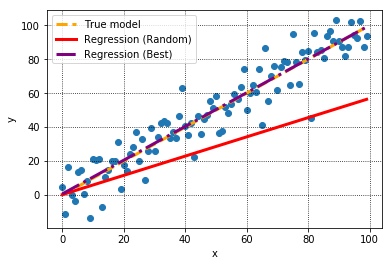

In [8]:
# オレンジ：真に得たいモデル
# 赤：重みをデタラメに決めたときのモデルの出力
# 紫：重みを最小二乗法に決めたときのモデルの出力
plt.scatter(x, y, marker='o')
plt.plot(x, y_true, linestyle='--', linewidth=3, color='orange', label='True model')
plt.plot(x, y_est, linestyle='-', linewidth=3, color='red', label='Regression (Random)')
plt.plot(x, y_est_best, linestyle='-.', linewidth=3, color='purple', label='Regression (Best)')
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

### 3. scikit-learnで線形回帰

In [9]:
# scikit learnのXは2次元の配列で入力することが基本であるため，ここで変換しておく
X = x.reshape(-1,1)

In [10]:
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)
y_est_sklearn = regr.intercept_ + regr.coef_[0] * x
squared_error = 0.5 * np.sum( (y_est_sklearn - y) ** 2)
print("w0 = {:.3f}, w1 = {:.3f}, 二乗誤差 = {:.3f}".format(regr.intercept_, regr.coef_[0], squared_error))

w0 = 0.696, w1 = 0.993, 二乗誤差 = 4954.924


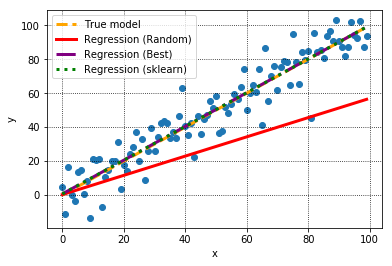

In [11]:
# オレンジ：真に得たいモデル
# 赤：重みをデタラメに決めたときのモデルの出力
# 紫：重みを最小二乗法に決めたときのモデルの出力
# 緑：scikit-learnで求めたモデルの出力
plt.scatter(x, y, marker='o')
plt.plot(x, y_true, linestyle='--', linewidth=3, color='orange', label='True model')
plt.plot(x, y_est, linestyle='-', linewidth=3, color='red', label='Regression (Random)')
plt.plot(x, y_est_best, linestyle='-.', linewidth=3, color='purple', label='Regression (Best)')
plt.plot(x, y_est_sklearn, linestyle=':', linewidth=3, color='green', label='Regression (sklearn)')
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

In [2]:
regr = LinearRegression(fit_intercept=True)